In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Quickfix😂👑🥰💄.txt', 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

17/12/21, 18:15 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
15/12/21, 13:49 - Aparna Sharma(USAR/ds-b1) created group "Quickfix😂👑🥰💄"
17/12/21, 18:15 - Aparna Sharma(USAR/ds-b1) added you
17/12/21, 18:15 - Ayushi(USAR-ml): Merko bnao admin
17/12/21, 18:15 - Tanishka Sharma(USAR/iiot): Nhi bs
17/12/21, 18:15 - Aparna Sharma(USAR/ds-b1) added Gauranshi Gupta USAR
17/12/21, 18:15 - Ayushi(USAR-ml): Main katayayini koo ktungi
17/12/21, 18:15 - Ayushi(USAR-ml): Plzz
17/12/21, 18:15 - Ayushi(USAR-ml): Bss yeh aur
17/12/21, 18:15 - Ayushi(USAR-ml): Phir koi nhi
17/12/21, 18:16 - Gauranshi Gupta USAR: Hello friends
17/12/21, 18:16 - Ayushi(USAR-ml): Hloo🥰🥰
17/12/21, 18:16 - Tanishka Sharma(USAR/iiot): Hi
17/12/21, 18:16 - Gauranshi Gupta USAR: This grp is about what
17/12/21, 18:16 - Gauranshi Gupta USAR: Objective? 😂
17/12/21, 18:16 - Tanishka Sharma(USAR/iiot): 😂😂😂😂
17/12/21, 18:17 - Aparna Sharm

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages = re.split(pattern, data)[1:]
len(messages)

4014

In [8]:
dates = re.findall(pattern, data)
dates

['17/12/21, 18:15 - ',
 '15/12/21, 13:49 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:15 - ',
 '17/12/21, 18:16 - ',
 '17/12/21, 18:16 - ',
 '17/12/21, 18:16 - ',
 '17/12/21, 18:16 - ',
 '17/12/21, 18:16 - ',
 '17/12/21, 18:16 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:17 - ',
 '17/12/21, 18:18 - ',
 '17/12/21, 18:18 - ',
 '17/12/21, 18:18 - ',
 '17/12/21, 18:18 - ',
 '17/12/21, 18:18 - ',
 '17/12/21, 18:18 - ',
 '17/12/21, 18:19 - ',
 '17/12/21, 18:19 - ',
 '17/12/21, 18:19 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:22 - ',
 '17/12/21, 18:20 - ',
 '17/12/21, 18:20 - ',
 '17/12/21,

In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-12-17 18:15:00
1,"Aparna Sharma(USAR/ds-b1) created group ""Quick...",2021-12-15 13:49:00
2,Aparna Sharma(USAR/ds-b1) added you\n,2021-12-17 18:15:00
3,Ayushi(USAR-ml): Merko bnao admin\n,2021-12-17 18:15:00
4,Tanishka Sharma(USAR/iiot): Nhi bs\n,2021-12-17 18:15:00


In [10]:
df.shape

(4014, 2)

In [11]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2021-12-17 18:15:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-12-15 13:49:00,group_notification,"Aparna Sharma(USAR/ds-b1) created group ""Quick..."
2,2021-12-17 18:15:00,group_notification,Aparna Sharma(USAR/ds-b1) added you\n
3,2021-12-17 18:15:00,Ayushi(USAR-ml),Merko bnao admin\n
4,2021-12-17 18:15:00,Tanishka Sharma(USAR/iiot),Nhi bs\n


In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2021-12-17 18:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-12-15 13:49:00,group_notification,"Aparna Sharma(USAR/ds-b1) created group ""Quick...",2021
2,2021-12-17 18:15:00,group_notification,Aparna Sharma(USAR/ds-b1) added you\n,2021
3,2021-12-17 18:15:00,Ayushi(USAR-ml),Merko bnao admin\n,2021
4,2021-12-17 18:15:00,Tanishka Sharma(USAR/iiot),Nhi bs\n,2021


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df['day'] = df['date'].dt.day

In [16]:
df['hour'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-12-17 18:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,December,17,18,15
1,2021-12-15 13:49:00,group_notification,"Aparna Sharma(USAR/ds-b1) created group ""Quick...",2021,December,15,13,49
2,2021-12-17 18:15:00,group_notification,Aparna Sharma(USAR/ds-b1) added you\n,2021,December,17,18,15
3,2021-12-17 18:15:00,Ayushi(USAR-ml),Merko bnao admin\n,2021,December,17,18,15
4,2021-12-17 18:15:00,Tanishka Sharma(USAR/iiot),Nhi bs\n,2021,December,17,18,15


In [19]:
words = []

for message in df['message']:
    words.extend(message.split())

In [20]:
len(words)

15501

In [21]:
df[df['message'] == '<Media omitted>\n']

,date,user,message,year,month,day,hour,minute
69,2021-12-17 19:31:00,Akshita Sharma(USAR/ml),<Media omitted>\n,2021,December,17,19,31
129,2021-12-17 21:56:00,Anusha Sharma(Igdtuw),<Media omitted>\n,2021,December,17,21,56
130,2021-12-17 21:56:00,Anusha Sharma(Igdtuw),<Media omitted>\n,2021,December,17,21,56
131,2021-12-17 21:56:00,Anusha Sharma(Igdtuw),<Media omitted>\n,2021,December,17,21,56
132,2021-12-17 21:56:00,Anusha Sharma(Igdtuw),<Media omitted>\n,2021,December,17,21,56
...,...,...,...,...,...,...,...,...
3952,2022-07-04 14:13:00,Akshita Sharma(USAR/ml),<Media omitted>\n,2022,July,4,14,13
3953,2022-07-04 14:13:00,Akshita Sharma(USAR/ml),<Media omitted>\n,2022,July,4,14,13
3954,2022-07-04 14:13:00,Akshita Sharma(USAR/ml),<Media omitted>\n,2022,July,4,14,13
3955,2022-07-04 14:13:00,Akshita Sharma(USAR/ml),<Media omitted>\n,2022,July,4,14,13


In [22]:
!pip install urlextract

In [23]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackoverflow.com and www.google.com")
urls

['stackoverflow.com', 'www.google.com']

In [24]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [25]:
links

['https://instagram.com/usict_newbies?utm_medium=copy_link',
 'Grup.pr',
 'https://forms.gle/SPVzHMdUAz7G5TA76',
 'https://forms.gle/SPVzHMdUAz7G5TA76',
 'https://chat.whatsapp.com/DUoNqZ6pPhTHPHJOzizLN9',
 'https://forms.gle/W6hPCqK6NFpiht4u8',
 'https://forms.gle/oRGmSbBhRAccpPEf7',
 'ho.SB',
 'https://chat.whatsapp.com/DOCdX2YVKKf56QKiPPCDWO',
 'https://meet.google.com/xiv-nguw-fvc',
 'https://chat.whatsapp.com/D8zvW6YF20mC8tbvZHu3Uz',
 'https://instagram.com/stories/usict_newbies/2732736344328603454?utm_medium=share_sheet',
 'https://instagram.com/stories/usict_newbies/2732720675574894587?utm_medium=share_sheet',
 'http://meet.google.com/mks-ragt-hbv',
 'https://docs.google.com/forms/d/e/1FAIpQLSflO1e9Dy7FbeB2jeqnlYhtSnoZ9GL9dAO_SisFXmJ0Xmtb-A/viewform?usp=sf_link',
 'https://strawpoll.com/6r3a55bry',
 'https://youtu.be/LsIZp35azSM',
 'https://meet.google.com/epk-uyre-ftj',
 'https://isp.internshala.com/?utm_source=ISP27&utm_medium=1451575&utm_campaign=University%20School%20Of%20Au

In [26]:
len(links)

23

In [27]:
df['user'].value_counts()

Aparna Sharma(USAR/ds-b1)     952
Tanishka Sharma(USAR/iiot)    625
Ayushi(USAR-ml)               580
Dr. Anshika Verma             425
Anusha Sharma(Igdtuw)         391
Akshita Sharma(USAR/ml)       380
Gauranshi Gupta USAR          340
+91 70420 77811               177
Subhangi Dhasmana             126
group_notification             13
+91 98181 62115                 5
Name: user, dtype: int64

In [28]:
# top 5 users
df['user'].value_counts().head()

Aparna Sharma(USAR/ds-b1)     952
Tanishka Sharma(USAR/iiot)    625
Ayushi(USAR-ml)               580
Dr. Anshika Verma             425
Anusha Sharma(Igdtuw)         391
Name: user, dtype: int64

In [29]:
import matplotlib.pyplot as plt

In [30]:
x = df['user'].value_counts().head()

name = x.index
count = x.values

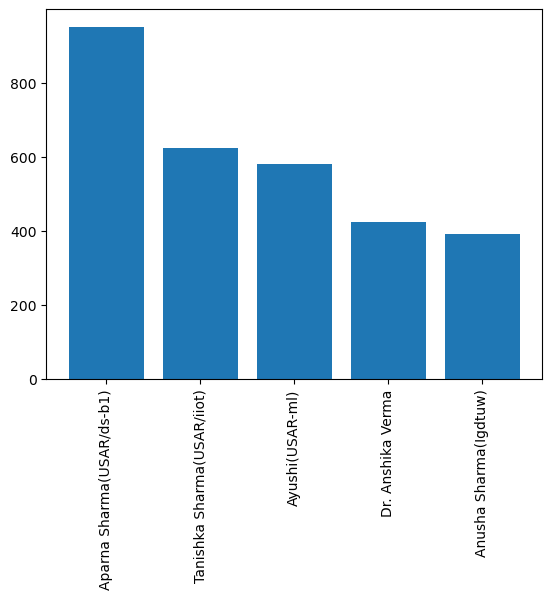

In [31]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
# percentage of which each user msg
round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,Aparna Sharma(USAR/ds-b1),23.72
1,Tanishka Sharma(USAR/iiot),15.57
2,Ayushi(USAR-ml),14.45
3,Dr. Anshika Verma,10.59
4,Anusha Sharma(Igdtuw),9.74
5,Akshita Sharma(USAR/ml),9.47
6,Gauranshi Gupta USAR,8.47
7,+91 70420 77811,4.41
8,Subhangi Dhasmana,3.14
9,group_notification,0.32


In [33]:
words = []

for message in df['message']:
    words.extend(message.split())

In [34]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Aparna',
 'Sharma(USAR/ds-b1)',
 'created',
 'group',
 '"Quickfix😂👑🥰💄"',
 'Aparna',
 'Sharma(USAR/ds-b1)',
 'added',
 'you',
 'Merko',
 'bnao',
 'admin',
 'Nhi',
 'bs',
 'Aparna',
 'Sharma(USAR/ds-b1)',
 'added',
 'Gauranshi',
 'Gupta',
 'USAR',
 'Main',
 'katayayini',
 'koo',
 'ktungi',
 'Plzz',
 'Bss',
 'yeh',
 'aur',
 'Phir',
 'koi',
 'nhi',
 'Hello',
 'friends',
 'Hloo🥰🥰',
 'Hi',
 'This',
 'grp',
 'is',
 'about',
 'what',
 'Objective?',
 '😂',
 '😂😂😂😂',
 'Objective',
 'ye',
 'h',
 'Wo',
 'Grup',
 'saari',
 'ldkio',
 'ka',
 'h',
 'clg',
 'ki',
 'N',
 'bhut',
 'msgs',
 'aate',
 'h',
 'Maine',
 'bs',
 'Apne',
 'frnds',
 'ko',
 'add',
 'kr',
 'rkha',
 'h',
 'Hn',
 'Acha',
 'ji',
 '👍',
 'Hn',
 'ji',
 '😂😂😂',
 'Yayy✌🏻😂',
 '🤭',
 'Welcome',
 'to',
 'the',

In [35]:
from collections import Counter
Counter(words)

Counter({'Messages': 1,
         'and': 53,
         'calls': 2,
         'are': 23,
         'end-to-end': 1,
         'encrypted.': 1,
         'No': 7,
         'one': 3,
         'outside': 2,
         'of': 29,
         'this': 28,
         'chat,': 1,
         'not': 17,
         'even': 2,
         'WhatsApp,': 1,
         'can': 5,
         'read': 3,
         'or': 18,
         'listen': 1,
         'to': 192,
         'them.': 3,
         'Tap': 1,
         'learn': 1,
         'more.': 1,
         'Aparna': 6,
         'Sharma(USAR/ds-b1)': 3,
         'created': 3,
         'group': 12,
         '"Quickfix😂👑🥰💄"': 1,
         'added': 5,
         'you': 41,
         'Merko': 1,
         'bnao': 1,
         'admin': 4,
         'Nhi': 35,
         'bs': 9,
         'Gauranshi': 3,
         'Gupta': 8,
         'USAR': 9,
         'Main': 28,
         'katayayini': 1,
         'koo': 7,
         'ktungi': 1,
         'Plzz': 2,
         'Bss': 4,
         'yeh': 34,
         '

In [36]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,433
1,omitted>,433
2,h,297
3,hai,262
4,to,192
5,bhi,144
6,nhi,140
7,ho,114
8,hi,100
9,kya,100


In [37]:
# remove group messages
# remove media omitted messages
# remove stop words

In [38]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [39]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [40]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [49]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,yr,89
1,😂😂😂,72
2,😂😂,69
3,hn,64
4,😂😂😂😂,52
5,🤣🤣🤣,50
6,message,49
7,deleted,47
8,yaar,42
9,freshers,40


In [53]:
!pip install emoji~=1.6.3

     ---------------------------------------- 0.0/174.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/174.2 kB ? eta -:--:--
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/174.2

In [56]:
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [58]:
emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emojidf

,0,1
0,😂,1062
1,🤣,543
2,🥲,124
3,❤,112
4,🥺,97
...,...,...
136,🎷,1
137,🏆,1
138,🎖,1
139,🏅,1


In [59]:
emojidf.head()

,0,1
0,😂,1062
1,🤣,543
2,🥲,124
3,❤,112
4,🥺,97


In [60]:
df['month_num'] = df['date'].dt.month

In [61]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2021-12-17 18:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,December,17,18,15,12
1,2021-12-15 13:49:00,group_notification,"Aparna Sharma(USAR/ds-b1) created group ""Quick...",2021,December,15,13,49,12
2,2021-12-17 18:15:00,group_notification,Aparna Sharma(USAR/ds-b1) added you\n,2021,December,17,18,15,12
3,2021-12-17 18:15:00,Ayushi(USAR-ml),Merko bnao admin\n,2021,December,17,18,15,12
4,2021-12-17 18:15:00,Tanishka Sharma(USAR/iiot),Nhi bs\n,2021,December,17,18,15,12
...,...,...,...,...,...,...,...,...,...
4009,2022-10-01 21:12:00,Ayushi(USAR-ml),I m in🌝\n,2022,October,1,21,12,10
4010,2022-10-01 21:39:00,Anusha Sharma(Igdtuw),Me too\n,2022,October,1,21,39,10
4011,2022-10-01 21:57:00,Aparna Sharma(USAR/ds-b1),Done!\n,2022,October,1,21,57,10
4012,2022-10-01 22:32:00,Tanishka Sharma(USAR/iiot),Ok then 10th ke baad milte h\n,2022,October,1,22,32,10


In [66]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2021,12,December,2691
1,2022,1,January,1118
2,2022,2,February,49
3,2022,3,March,36
4,2022,4,April,41
5,2022,7,July,23
6,2022,10,October,56


In [69]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [70]:
time

['December-2021',
 'January-2022',
 'February-2022',
 'March-2022',
 'April-2022',
 'July-2022',
 'October-2022']

In [71]:
timeline['time'] = time

In [72]:
timeline

,year,month_num,month,message,time
0,2021,12,December,2691,December-2021
1,2022,1,January,1118,January-2022
2,2022,2,February,49,February-2022
3,2022,3,March,36,March-2022
4,2022,4,April,41,April-2022
5,2022,7,July,23,July-2022
6,2022,10,October,56,October-2022


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'December-2021'),
  Text(1, 0, 'January-2022'),
  Text(2, 0, 'February-2022'),
  Text(3, 0, 'March-2022'),
  Text(4, 0, 'April-2022'),
  Text(5, 0, 'July-2022'),
  Text(6, 0, 'October-2022')])

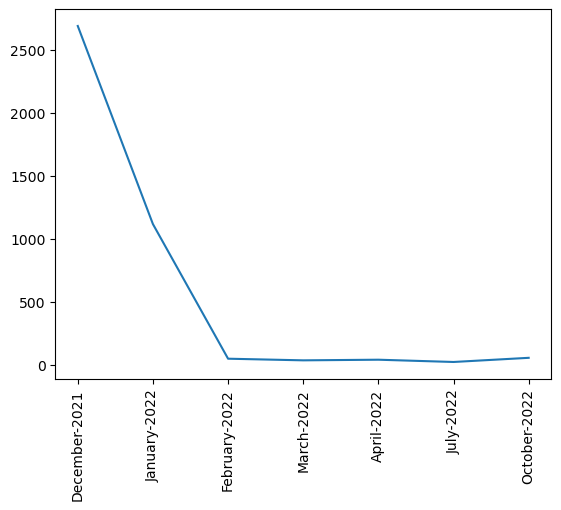

In [74]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')

In [75]:
df['daily_date'] = df['date'].dt.date

In [77]:
daily_timeline = df.groupby('daily_date').count()['message'].reset_index()

In [78]:
daily_timeline

,daily_date,message
0,2021-12-15,1
1,2021-12-17,161
2,2021-12-18,589
3,2021-12-19,288
4,2021-12-20,248
5,2021-12-21,57
6,2021-12-22,448
7,2021-12-23,83
8,2021-12-24,17
9,2021-12-25,103


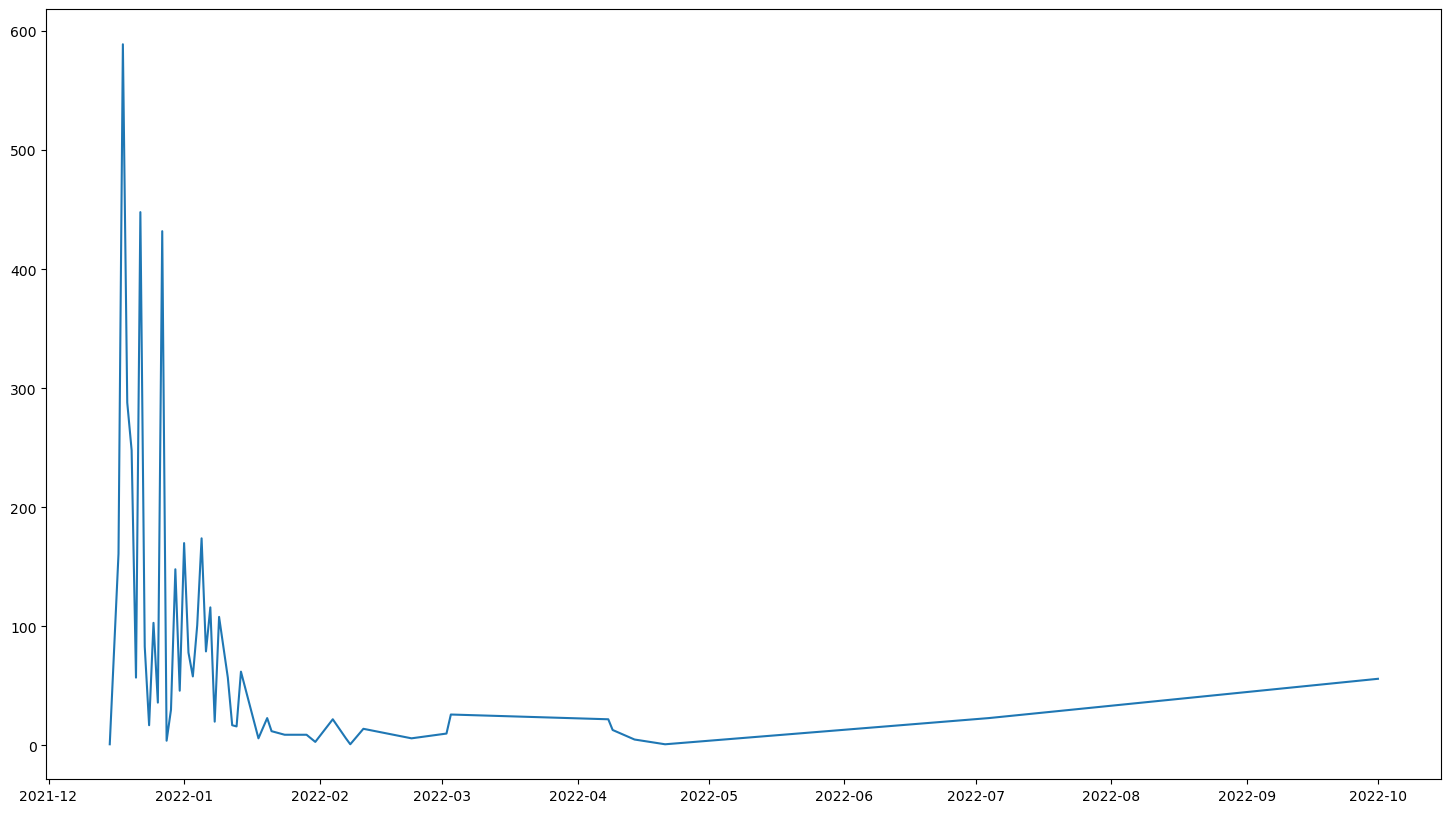

In [80]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['daily_date'], daily_timeline['message'])

In [81]:
df['day_name'] = df['date'].dt.day_name()

In [84]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+"-"+str('00'))
    elif hour == 0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [85]:
df['period'] = period

In [86]:
df

,date,user,message,year,month,day,hour,minute,month_num,daily_date,day_name,period
0,2021-12-17 18:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,December,17,18,15,12,2021-12-17,Friday,18-19
1,2021-12-15 13:49:00,group_notification,"Aparna Sharma(USAR/ds-b1) created group ""Quick...",2021,December,15,13,49,12,2021-12-15,Wednesday,13-14
2,2021-12-17 18:15:00,group_notification,Aparna Sharma(USAR/ds-b1) added you\n,2021,December,17,18,15,12,2021-12-17,Friday,18-19
3,2021-12-17 18:15:00,Ayushi(USAR-ml),Merko bnao admin\n,2021,December,17,18,15,12,2021-12-17,Friday,18-19
4,2021-12-17 18:15:00,Tanishka Sharma(USAR/iiot),Nhi bs\n,2021,December,17,18,15,12,2021-12-17,Friday,18-19
...,...,...,...,...,...,...,...,...,...,...,...,...
4009,2022-10-01 21:12:00,Ayushi(USAR-ml),I m in🌝\n,2022,October,1,21,12,10,2022-10-01,Saturday,21-22
4010,2022-10-01 21:39:00,Anusha Sharma(Igdtuw),Me too\n,2022,October,1,21,39,10,2022-10-01,Saturday,21-22
4011,2022-10-01 21:57:00,Aparna Sharma(USAR/ds-b1),Done!\n,2022,October,1,21,57,10,2022-10-01,Saturday,21-22
4012,2022-10-01 22:32:00,Tanishka Sharma(USAR/iiot),Ok then 10th ke baad milte h\n,2022,October,1,22,32,10,2022-10-01,Saturday,22-23


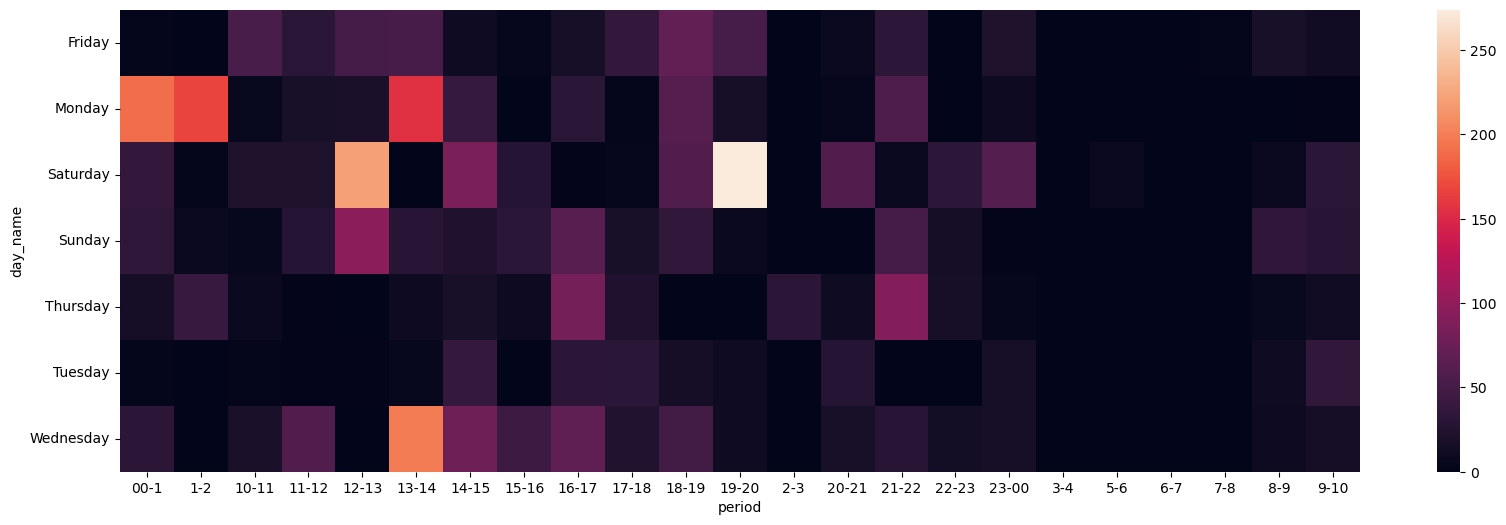

In [90]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()